In [196]:
import pandas as pd 

import numpy as np 

import seaborn as sb

In [197]:
test_df = pd.read_csv("BitcoinHeistData.csv")
train_df= pd.read_csv("BitcoinHeistData.csv")

In [198]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   address    object 
 1   year       int64  
 2   day        int64  
 3   length     int64  
 4   weight     float64
 5   count      int64  
 6   looped     int64  
 7   neighbors  int64  
 8   income     float64
 9   label      object 
dtypes: float64(2), int64(6), object(2)
memory usage: 222.5+ MB


In [199]:
train_df.describe()

,year,day,length,weight,count,looped,neighbors,income
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09
std,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


In [200]:
train_df.head(10)

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,8.333333e-03,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,2.441406e-04,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000e+00,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,3.906250e-03,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,7.284841e-02,456,0,1,200000000.0,princetonLocky
5,112AmFATxzhuSpvtz1hfpa3Zrw3BG276pc,2016,96,144,8.461400e-02,2821,0,1,50000000.0,princetonLocky
6,112E91jxS2qrQY1z78LPWUWrLVFGqbYPQ1,2016,225,142,2.088519e-03,881,0,2,100000000.0,princetonCerber
7,112eFykaD53KEkKeYW9KW8eWebZYSbt2f5,2016,324,78,3.906250e-03,1,0,2,100990000.0,princetonCerber
8,112FTiRdJjMrNgEtd4fvdoq3TC33Ah5Dep,2016,298,144,2.302828e+00,4220,0,2,80000000.0,princetonCerber
9,112GocBgFSnaote6krx828qaockFraD8mp,2016,62,112,3.725290e-09,1,0,1,50000000.0,princetonLocky


In [201]:
to_drop = ['address',
...            'neighbors']

>>> train_df.drop(to_drop, inplace=True, axis=1)

train_df.head(20)

,year,day,length,weight,count,looped,income,label
0,2017,11,18,8.333333e-03,1,0,100050000.0,princetonCerber
1,2016,132,44,2.441406e-04,1,0,100000000.0,princetonLocky
2,2016,246,0,1.000000e+00,1,0,200000000.0,princetonCerber
3,2016,322,72,3.906250e-03,1,0,71200000.0,princetonCerber
4,2016,238,144,7.284841e-02,456,0,200000000.0,princetonLocky
5,2016,96,144,8.461400e-02,2821,0,50000000.0,princetonLocky
6,2016,225,142,2.088519e-03,881,0,100000000.0,princetonCerber
7,2016,324,78,3.906250e-03,1,0,100990000.0,princetonCerber
8,2016,298,144,2.302828e+00,4220,0,80000000.0,princetonCerber
9,2016,62,112,3.725290e-09,1,0,50000000.0,princetonLocky


In [202]:
train_df.tail(10)

,year,day,length,weight,count,looped,income,label
2916687,2018,330,0,0.500000,1,0,1.000000e+09,white
2916688,2018,330,144,0.217451,8247,8247,1.999500e+08,white
2916689,2018,330,26,1.000000,1,0,1.381033e+08,white
2916690,2018,330,56,0.041667,1,0,3.356822e+08,white
2916691,2018,330,144,5.763587,6237,0,1.949961e+09,white
2916692,2018,330,0,0.111111,1,0,1.255809e+09,white
2916693,2018,330,0,1.000000,1,0,4.409699e+07,white
2916694,2018,330,2,12.000000,6,6,2.398267e+09,white
2916695,2018,330,0,0.500000,1,0,1.780427e+08,white
2916696,2018,330,144,0.073972,6800,0,1.123500e+08,white


In [203]:
train_df.label[train_df.label == 'white'] = 0
train_df.tail(10)

C:\Users\saudm\AppData\Local\Temp/ipykernel_11880/3770351175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.label[train_df.label == 'white'] = 0


,year,day,length,weight,count,looped,income,label
2916687,2018,330,0,0.500000,1,0,1.000000e+09,0
2916688,2018,330,144,0.217451,8247,8247,1.999500e+08,0
2916689,2018,330,26,1.000000,1,0,1.381033e+08,0
2916690,2018,330,56,0.041667,1,0,3.356822e+08,0
2916691,2018,330,144,5.763587,6237,0,1.949961e+09,0
2916692,2018,330,0,0.111111,1,0,1.255809e+09,0
2916693,2018,330,0,1.000000,1,0,4.409699e+07,0
2916694,2018,330,2,12.000000,6,6,2.398267e+09,0
2916695,2018,330,0,0.500000,1,0,1.780427e+08,0
2916696,2018,330,144,0.073972,6800,0,1.123500e+08,0


In [204]:
train_df['label'] = pd.to_numeric(
    train_df['label'], 
    errors='coerce'
).fillna(1).astype('int')


train_df.head(20)

,year,day,length,weight,count,looped,income,label
0,2017,11,18,8.333333e-03,1,0,100050000.0,1
1,2016,132,44,2.441406e-04,1,0,100000000.0,1
2,2016,246,0,1.000000e+00,1,0,200000000.0,1
3,2016,322,72,3.906250e-03,1,0,71200000.0,1
4,2016,238,144,7.284841e-02,456,0,200000000.0,1
5,2016,96,144,8.461400e-02,2821,0,50000000.0,1
6,2016,225,142,2.088519e-03,881,0,100000000.0,1
7,2016,324,78,3.906250e-03,1,0,100990000.0,1
8,2016,298,144,2.302828e+00,4220,0,80000000.0,1
9,2016,62,112,3.725290e-09,1,0,50000000.0,1


<AxesSubplot:xlabel='label', ylabel='year'>

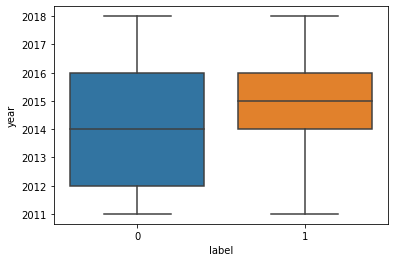

In [205]:
import seaborn as sns
sns.boxplot(x="label", y="year", data=train_df)

In [206]:
train_df.round(decimals = 4)

,year,day,length,weight,count,looped,income,label
0,2017,11,18,0.0083,1,0,1.000500e+08,1
1,2016,132,44,0.0002,1,0,1.000000e+08,1
2,2016,246,0,1.0000,1,0,2.000000e+08,1
3,2016,322,72,0.0039,1,0,7.120000e+07,1
4,2016,238,144,0.0728,456,0,2.000000e+08,1
...,...,...,...,...,...,...,...,...
2916692,2018,330,0,0.1111,1,0,1.255809e+09,0
2916693,2018,330,0,1.0000,1,0,4.409699e+07,0
2916694,2018,330,2,12.0000,6,6,2.398267e+09,0
2916695,2018,330,0,0.5000,1,0,1.780427e+08,0


          year     day  length  weight   count  looped  income   label
year    1.0000 -0.0403  0.1631  0.0118  0.2854  0.1132 -0.0205  0.0214
day    -0.0403  1.0000  0.0119  0.0009 -0.0025  0.0026  0.0026 -0.0081
length  0.1631  0.0119  1.0000  0.0002  0.7035  0.4116  0.0005 -0.0069
weight  0.0118  0.0009  0.0002  1.0000  0.0223  0.0616  0.0698  0.0027
count   0.2854 -0.0025  0.7035  0.0223  1.0000  0.5604 -0.0036 -0.0087
looped  0.1132  0.0026  0.4116  0.0616  0.5604  1.0000  0.0026 -0.0178
income -0.0205  0.0026  0.0005  0.0698 -0.0036  0.0026  1.0000 -0.0027
label   0.0214 -0.0081 -0.0069  0.0027 -0.0087 -0.0178 -0.0027  1.0000


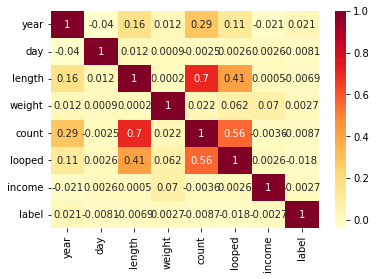

In [207]:
print(train_df.corr().round(decimals = 4))
dataplot = sb.heatmap(train_df.corr().round(decimals = 4), cmap="YlOrRd",annot = True)

In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
# split data
from sklearn.model_selection import train_test_split 
from sklearn import tree
import tensorflow as tf

X = train_df.drop(['label'],axis=1)
Y = train_df['label']


X_train, X_test, Y_train, Y_test, = train_test_split(X,Y, test_size = 0.5, random_state = 1)


# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.Precision()])
# fit the keras model on the dataset
model.fit(X_train, Y_train, epochs=3, batch_size=50)
Y_pred = model.predict(X_test)
# evaluate the keras model
_, trainPrecision = model.evaluate(Y_test, Y_pred)
print('Precision:', tf.keras.metrics.precision_score(Y_test,Y_pred))

Epoch 1/3
48477/58334 [=======================>......] - ETA: 10s - loss: 0.0144 - precision_15: 0.0000e+00

In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
# split data
from sklearn.model_selection import train_test_split 
from sklearn import tree
import tensorflow as tf

X = train_df.drop(['label'],axis=1)
Y = train_df['label']


X_train, X_test, Y_train, Y_test, = train_test_split(X,Y, test_size = 0.5, random_state = 1)


# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(optimizer='sgd',
              loss='mse',
              metrics=[tf.keras.metrics.Recall()])
# fit the keras model on the dataset
model.fit(X_train, Y_train, epochs=3, batch_size=50)

# evaluate the keras model
_, trainRecall = model.evaluate(X_train, Y_train)
_, testRecall = model.evaluate(X_test, Y_test)
print('Train Recall: %.2f' % (trainRecall*100))


In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
# split data
from sklearn.model_selection import train_test_split 
from sklearn import tree

X = train_df.drop(['label'],axis=1)
Y = train_df['label']


X_train, X_test, Y_train, Y_test, = train_test_split(X,Y, test_size = 0.5, random_state = 1)


# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, Y_train, epochs=3, batch_size=50)
model.fit(X_test, Y_test, epochs=3, batch_size=50)
# evaluate the keras model
_, trainAccuracy = model.evaluate(X_train, Y_train)
_, testAccuracy = model.evaluate(X_test, Y_test)
print('Train Accuracy: %.2f' % (trainAccuracy*100))
print('Test Accuracy: %.2f' % (testAccuracy*100))